In [16]:
#install ucirepo library 
# pip install ucimlrepo

In [17]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [18]:
spambase = fetch_ucirepo(id=94)

# Data as pandas DataFrames
x = spambase.data.features
y = spambase.data.targets

np.ravel(y)


array([1, 1, 1, ..., 0, 0, 0], shape=(4601,))

In [19]:
x.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [20]:
x.shape

(4601, 57)

In [21]:
y
# 1 is spam and 0 is not spam


,Class
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0


In [22]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, np.ravel(y), test_size=0.2, random_state=42)

In [23]:
# Standardization
scalar = StandardScaler()
x_train_Scaled = scalar.fit_transform(x_train)
x_test_Scaled = scalar.transform(x_test)

## Model training and evaluation

Logistic Regression

In [24]:
logistic_reg = LogisticRegression()

logistic_reg.fit(x_train, y_train)  # withpout scaling
y_pred_logistic = logistic_reg.predict(x_test)

logistic_reg_accuracy = accuracy_score(y_test, y_pred_logistic)

print("accuracy of Logistic Regression without scaling: ", logistic_reg_accuracy*100, "%")
print(classification_report(y_test, y_pred_logistic))

accuracy of Logistic Regression without scaling:  92.61672095548317 %
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       531
           1       0.92      0.91      0.91       390

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



Precision - Out of 100 mails classified as spam(1), 92 are actually spam.
Recall - out of 100 spam mails, 91 are classified in spam.
F1 score is harmonic mean fo Precisiona and recall

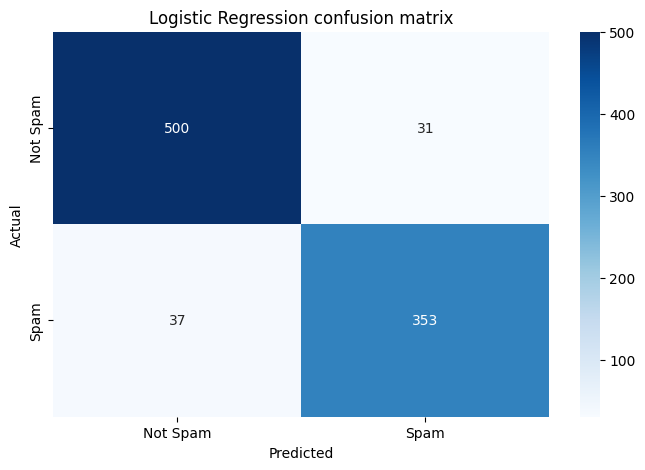

In [27]:
logistic_reg_cm = confusion_matrix(y_test, y_pred_logistic)

#plot

plt.figure(figsize=(8,5))
sns.heatmap(logistic_reg_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted') 
plt.title('Logistic Regression confusion matrix')
plt.show()

Recall #out of 531(spam and not spam) test samples, 500 are correctly classified
Precision # out of 537 samples, Actual 500 values are not spam and 37 are spam. 
same for 384 values, 353 are actually spam and 31 values not spam, classified as spam.

Actual Spam value should be more and actual not spam as predicted spam should be less(31)